<a href="https://colab.research.google.com/github/as53175n/FINALCODE/blob/main/FINALCODE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MENTAL HEALTH AT WORKPLACE***


*    In today's environment, mental wellness is more important than ever. High stress, long hours, work pressure, building a reputation for oneself, and a work-life balance between personal and professional life are all symptoms of mental illness disorder.
*   We have explored what are the differences in the prevalence of mental disease and attitudes toward mental health by geographic location? What are the most powerful predictors of mental illness in the workplace, as well as specific attitudes regarding mental health? It is important detection and diagnosis of mental health conditions.


*   This research illuminates the most effective techniques for improving employee wellbeing and encouraging them to seek treatment when necessary.





***INITIAL UNDERSTANDING OF THE DATA***

*   Suppressing warnings to clean up the output.
*   Importing core libraries and Importing libraries that enable visualization of both the data and the analysis.
*   Ensuring that matplotlib plots are displayed inline.
*   Mounting Google Drive to the Colab environment, making files in Google Drive accessible.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#basic libraries

import numpy as np
import pandas as pd

#visualization libraries

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


In [2]:
import os
from google.colab import drive
drive.mount("/content/drive/")
!ls

Mounted at /content/drive/
drive  sample_data


In [3]:
mh_dataset = pd.read_csv("/content/drive/MyDrive/MentalHealth/survey.csv")

In [4]:
mh_dataset.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


***UNDERSTANDING THE COLUMNS***
*   The dataset contains 26 columns in total.The columns are all of object datatype, with the exception of the age column.
*   Since the comment box was optional, it is logical to assume that the majority of respondents would leave it blank. This is why the comment column appears to have the majority of null values (70%) of all the responses.
*   Since almost 60% of the population is American, it would be incredibly false to claim that a particular nation has more issues with employee mental health.
*   Additionally, there are numerous nations with a single response.
Thus, the country column loses its meaning. This will be doped.
We'll also drop it as a cursory glance at the states indicates that it only applies to those in the US.



In [5]:
mh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
print(mh_dataset['Country'].value_counts())
print("\n \n")
print(mh_dataset['state'].unique())

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

In [7]:
mh_dataset.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

***DATA PREPARATION & PERFORMING FEATURE ENGINEERING***
*   In order to see different ages and gender notations in the data, we are printing the different numbers from the 'Age' and 'Gender' columns.
*    Visualizes missing values in the dataset with a missingno bar plot and adds custom text annotations for context.



In [8]:
print("The dataset contains different age groups including: \n")
print(mh_dataset['Age'].unique())
print("\n \n")
print("The different gender notations used in our dataset are: \n")
print(mh_dataset['Gender'].unique())

The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

 

The different gender notations used in our dataset are: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fl

In [9]:
mh_dataset.drop(mh_dataset[mh_dataset['Age'] < 0].index, inplace = True)
mh_dataset.drop(mh_dataset[mh_dataset['Age'] > 100].index, inplace = True)
mh_dataset['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [10]:
mh_dataset['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

mh_dataset['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

mh_dataset["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

mh_dataset['Gender'].value_counts()

,count
Gender,
Male,988
Female,247
Other,19


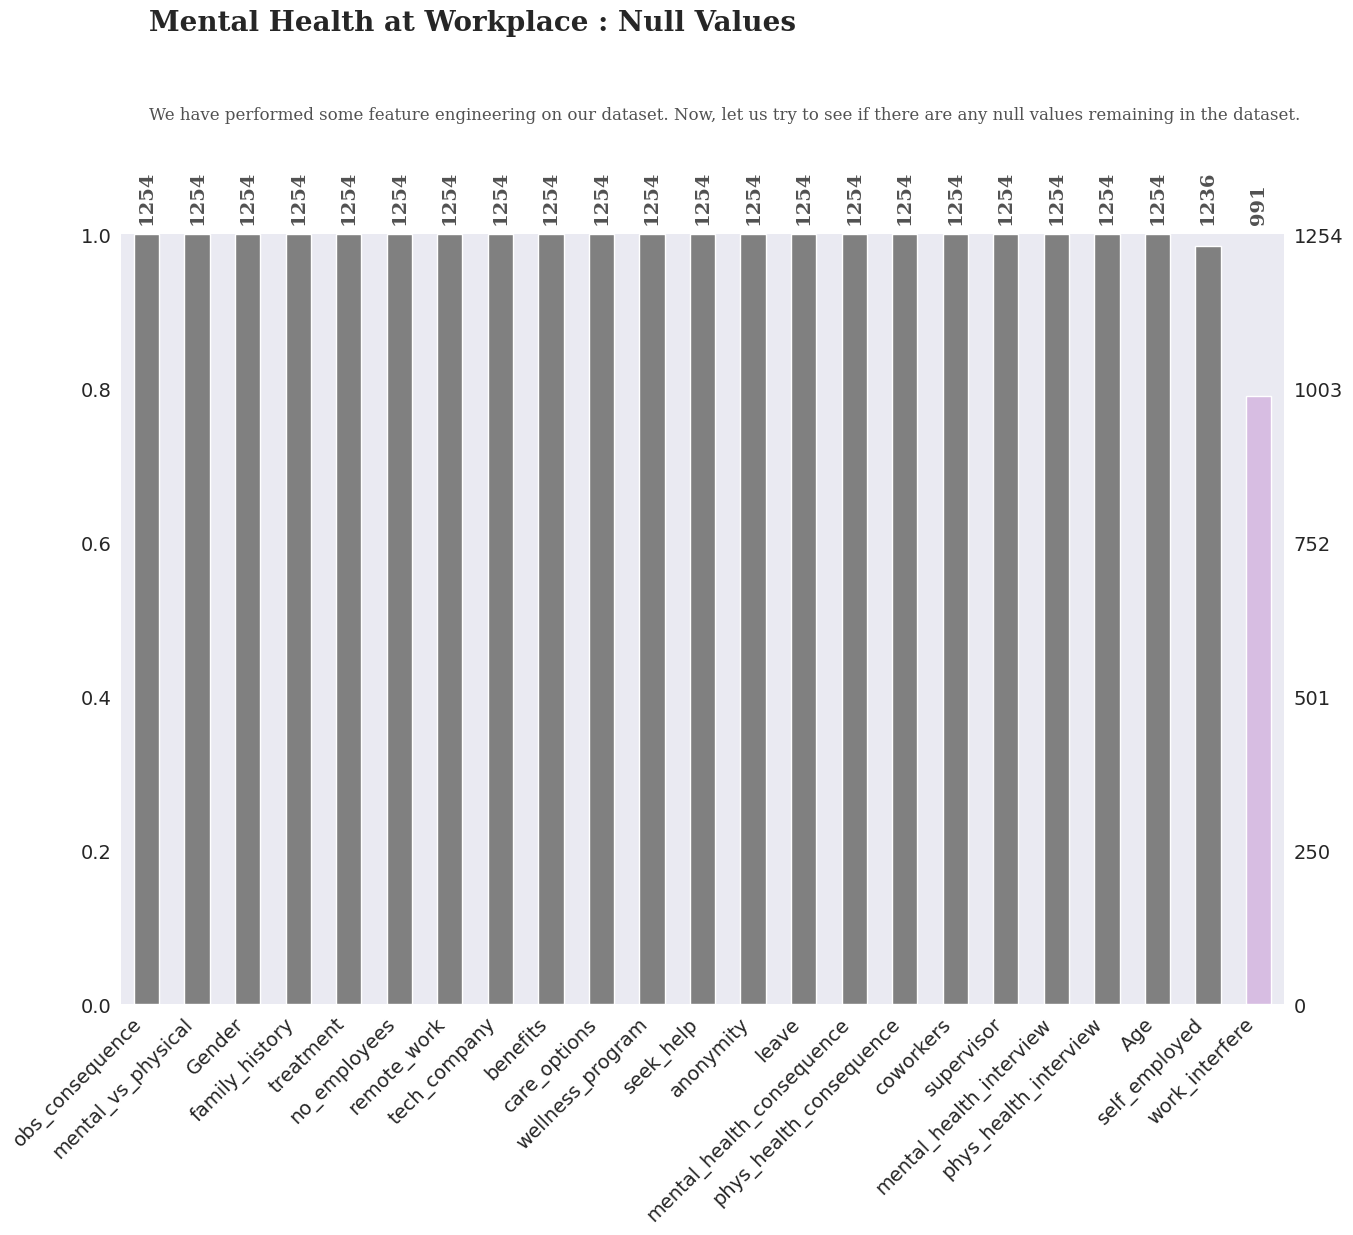

In [11]:
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
msno.bar(mh_dataset,fontsize =14, color = color, sort = 'descending', figsize = (15,10))

plt.text(0.05,1.265,'Mental Health at Workplace : Null Values', {'font':'serif', 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''We have performed some feature engineering on our dataset. Now, let us try to see if there are any null values remaining in the dataset.''', {'font':'serif', 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90,
                   **{'font':'serif','size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()

In [12]:
mh_dataset['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [13]:
mh_dataset['self_employed'] = mh_dataset['self_employed'].fillna('No')
mh_dataset['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
mh_dataset['work_interfere'].unique()


array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [15]:
mh_dataset['work_interfere'] = mh_dataset['work_interfere'].fillna("Don't Know")
mh_dataset['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', "Don't Know"],
      dtype=object)

In [16]:
mh_dataset['work_interfere'].value_counts()

,count
work_interfere,
Sometimes,464
Don't Know,263
Never,213
Rarely,173
Often,141


# ***EXPLORATORY DATA ANALYSIS (EDA)***

  treatment  percentage
0       Yes    0.504785
1        No    0.495215


<Axes: title={'center': 'Number of Employees who wants to take Treatment'}, xlabel='treatment', ylabel='percentage'>

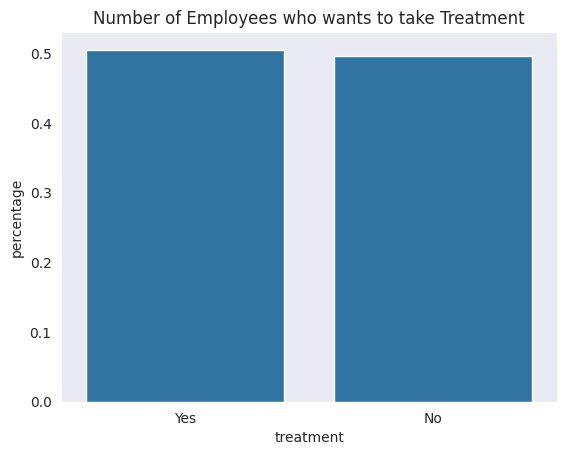

In [17]:
par = mh_dataset['treatment'].value_counts(normalize=True).rename_axis('treatment').reset_index(name = 'percentage')
print(par)
plt.title('Number of Employees who wants to take Treatment')
sns.barplot(x = 'treatment', y = 'percentage', data = par)

<Axes: ylabel='percentage'>

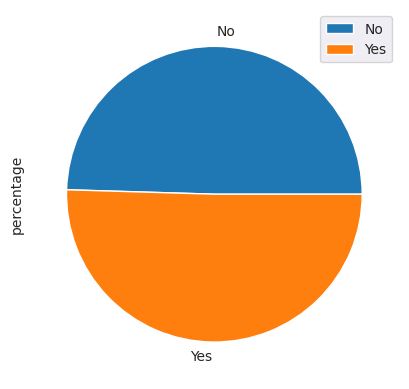

In [18]:
par.groupby(['treatment']).sum().plot(kind='pie', y='percentage')

In [19]:
def cal_per(col):
  percentage = col.value_counts(normalize=True).rename_axis(col.name).reset_index(name = 'percentage')
  return percentage

In [20]:
def pl_fig(col, title1, title2):
  plt.figure(figsize = (15,4))
  plt.subplot(1,2,1)
  per = cal_per(col)
  plt.title(title1)
  sns.barplot(x = col.name, y = 'percentage', data = per)
  plt.subplot(1,2,2)
  plt.title(title2)
  sns.countplot(x = col, y=None , hue=mh_dataset['treatment'])
  plt.show()


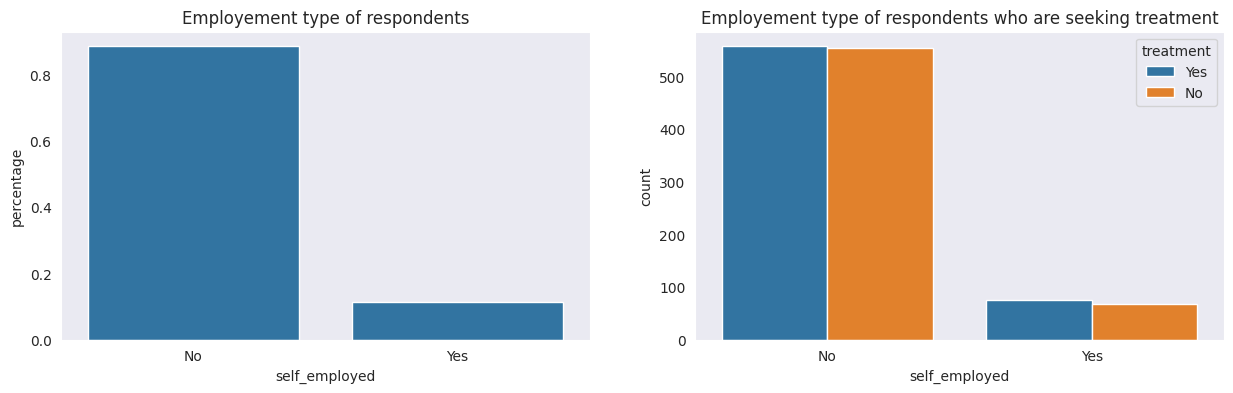

In [21]:
title1 = 'Employement type of respondents'
title2 = 'Employement type of respondents who are seeking treatment'
pl_fig(mh_dataset['self_employed'],title1, title2)

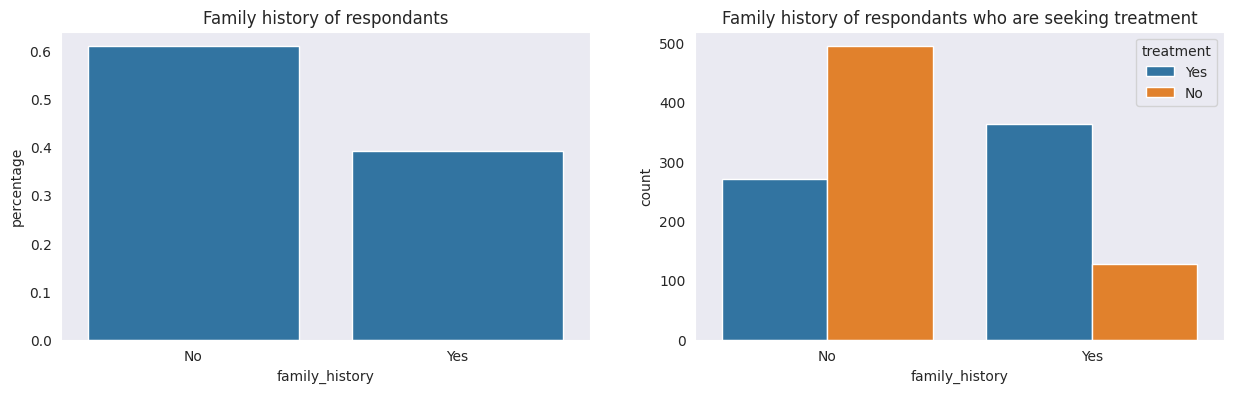

In [22]:

title1 = 'Family history of respondants'
title2 = 'Family history of respondants who are seeking treatment'
pl_fig(mh_dataset['family_history'],title1, title2)

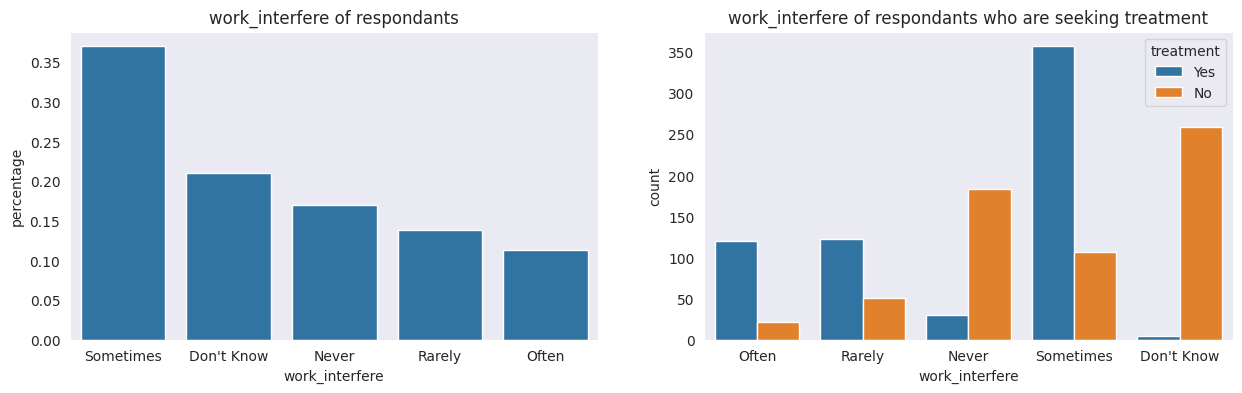

In [23]:
title1 = 'work_interfere of respondants'
title2 = 'work_interfere of respondants who are seeking treatment'
pl_fig(mh_dataset['work_interfere'],title1, title2)

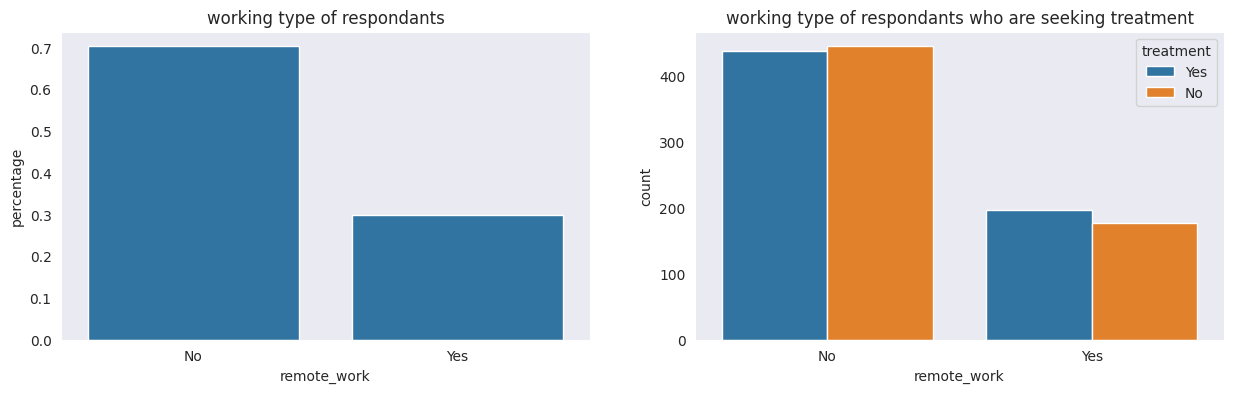

In [24]:
title1 = 'working type of respondants'
title2 = 'working type of respondants who are seeking treatment'
pl_fig(mh_dataset['remote_work'],title1, title2)

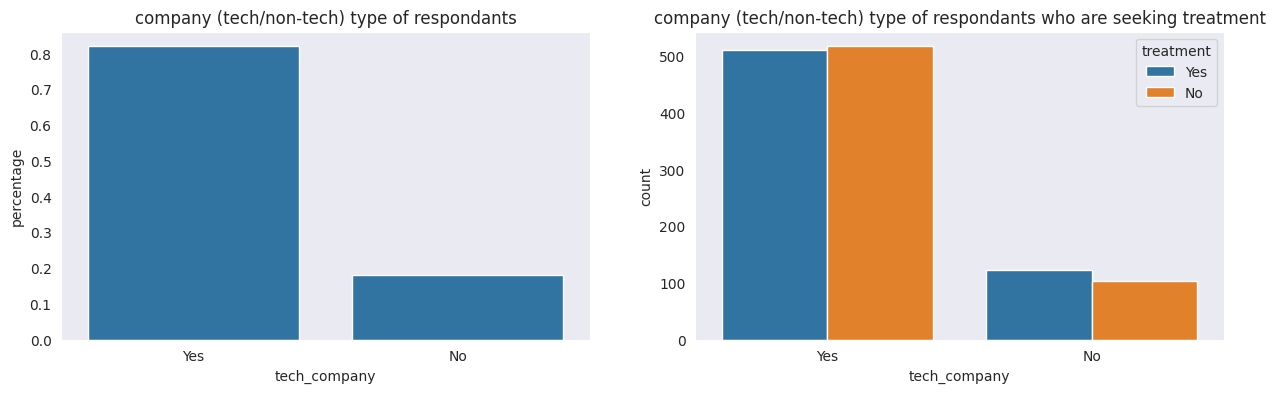

In [25]:
title1 = 'company (tech/non-tech) type of respondants'
title2 = 'company (tech/non-tech) type of respondants who are seeking treatment'
pl_fig(mh_dataset['tech_company'],title1, title2)

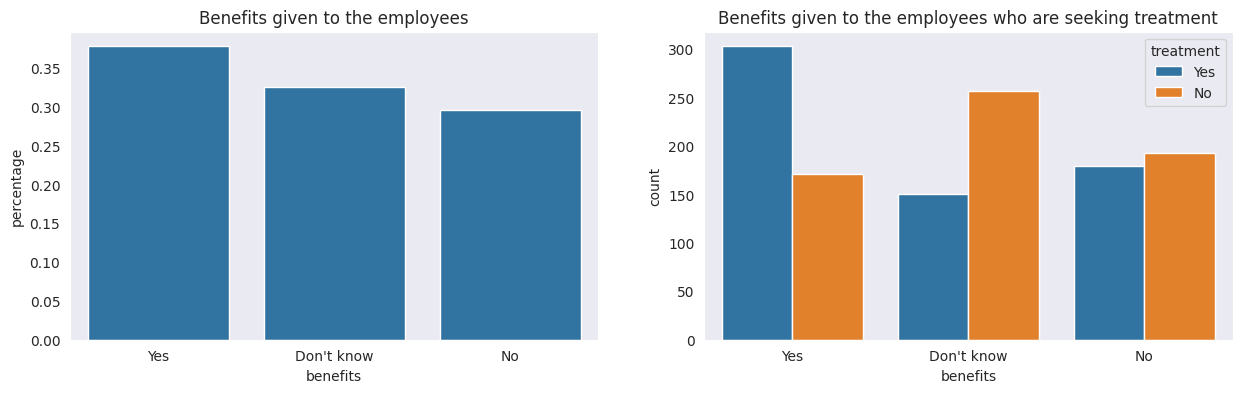

In [26]:
title1 = 'Benefits given to the employees'
title2 = 'Benefits given to the employees who are seeking treatment'
pl_fig(mh_dataset['benefits'],title1, title2)

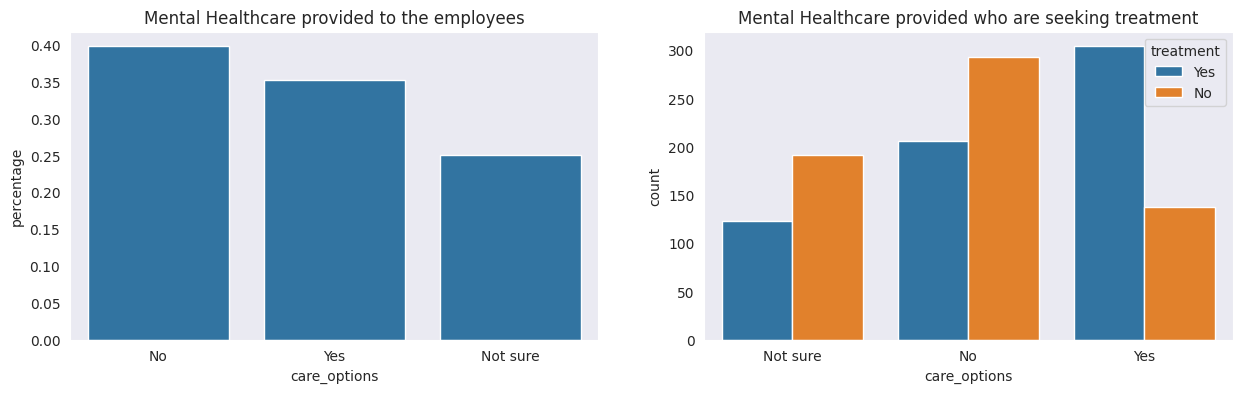

In [27]:
title1 = 'Mental Healthcare provided to the employees'
title2 = 'Mental Healthcare provided who are seeking treatment'
pl_fig(mh_dataset['care_options'],title1, title2)

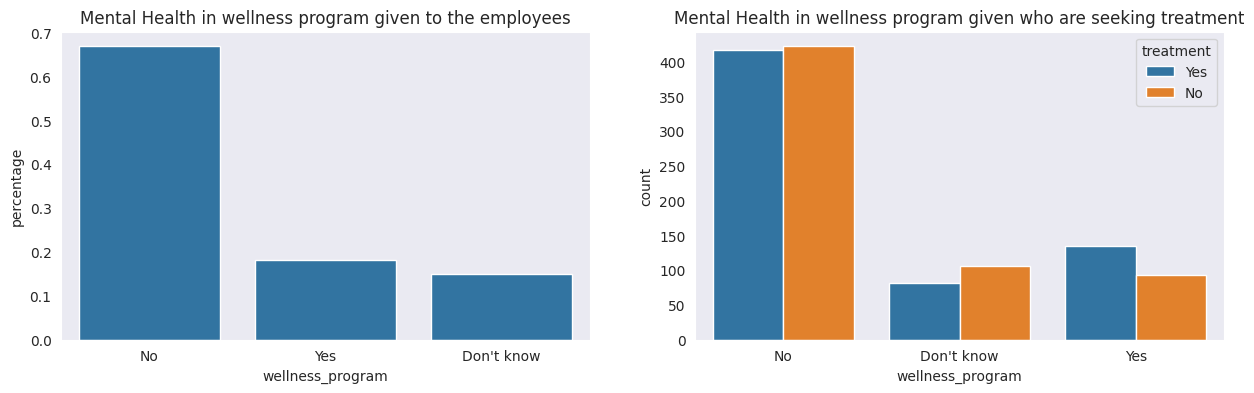

In [28]:
title1 = 'Mental Health in wellness program given to the employees'
title2 = 'Mental Health in wellness program given who are seeking treatment'
pl_fig(mh_dataset['wellness_program'],title1, title2)

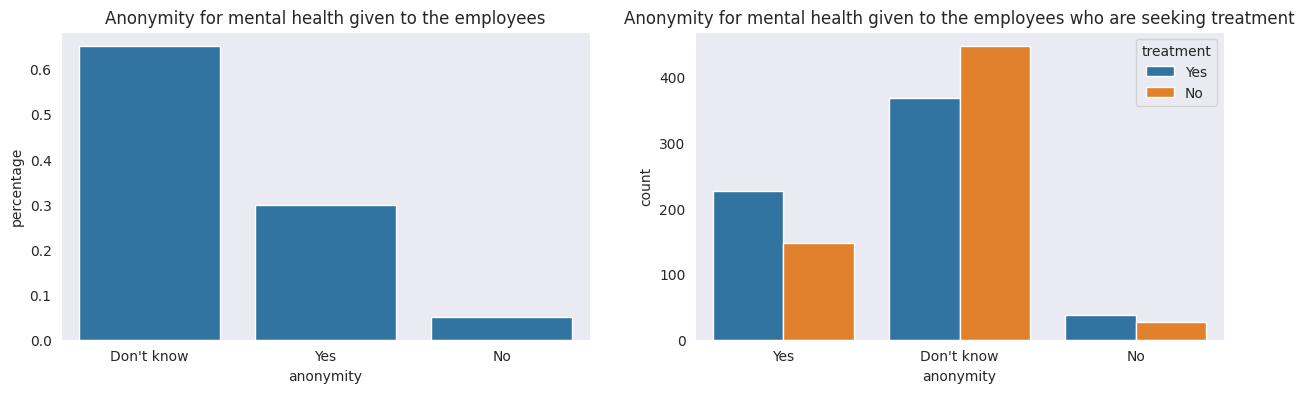

In [29]:
title1 = 'Anonymity for mental health given to the employees'
title2 = 'Anonymity for mental health given to the employees who are seeking treatment'
pl_fig(mh_dataset['anonymity'],title1, title2)

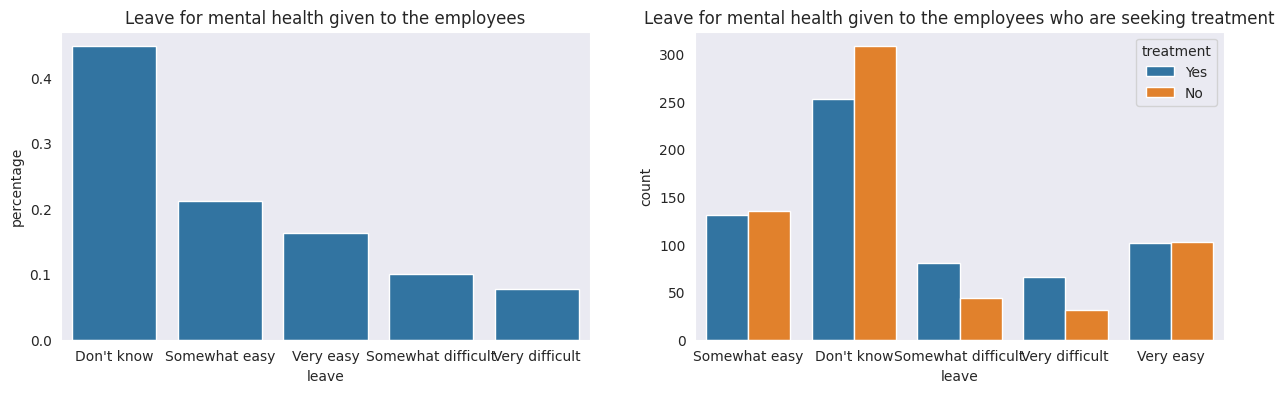

In [30]:
title1 = 'Leave for mental health given to the employees'
title2 = 'Leave for mental health given to the employees who are seeking treatment'
pl_fig(mh_dataset['leave'],title1, title2)

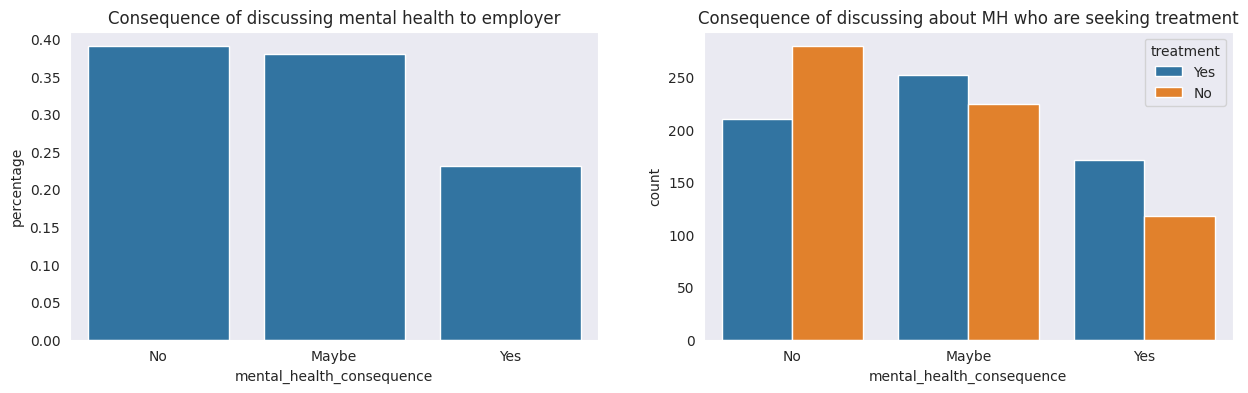

In [31]:
title1 = 'Consequence of discussing mental health to employer'
title2 = 'Consequence of discussing about MH who are seeking treatment'
pl_fig(mh_dataset['mental_health_consequence'],title1, title2)

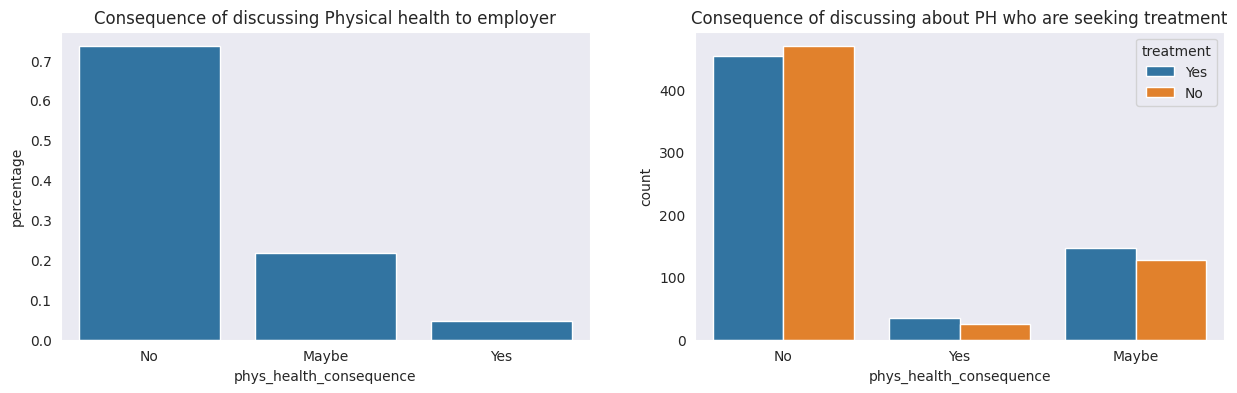

In [32]:
title1 = 'Consequence of discussing Physical health to employer'
title2 = 'Consequence of discussing about PH who are seeking treatment'
pl_fig(mh_dataset['phys_health_consequence'],title1, title2)

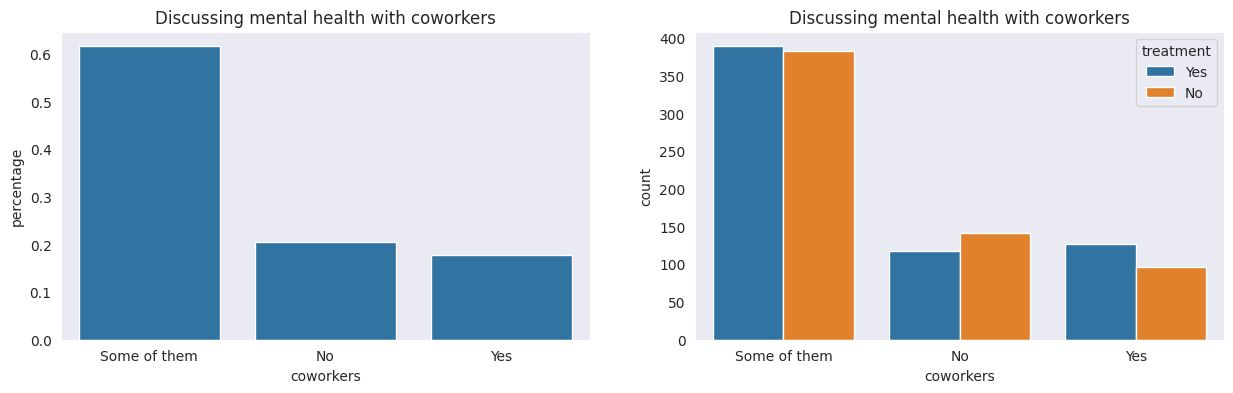

In [33]:
title1 = 'Discussing mental health with coworkers'
pl_fig(mh_dataset['coworkers'],title1, title1)

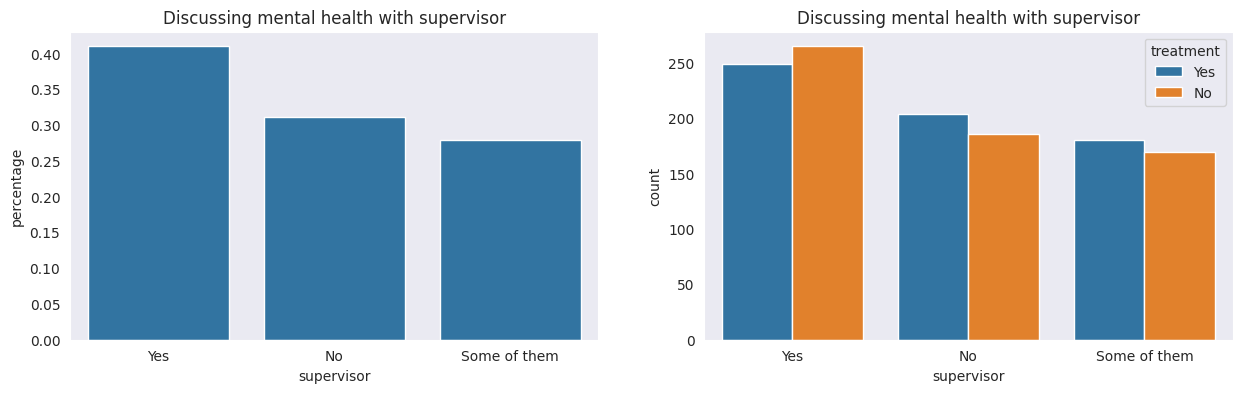

In [34]:
title1 = 'Discussing mental health with supervisor'
pl_fig(mh_dataset['supervisor'],title1, title1)

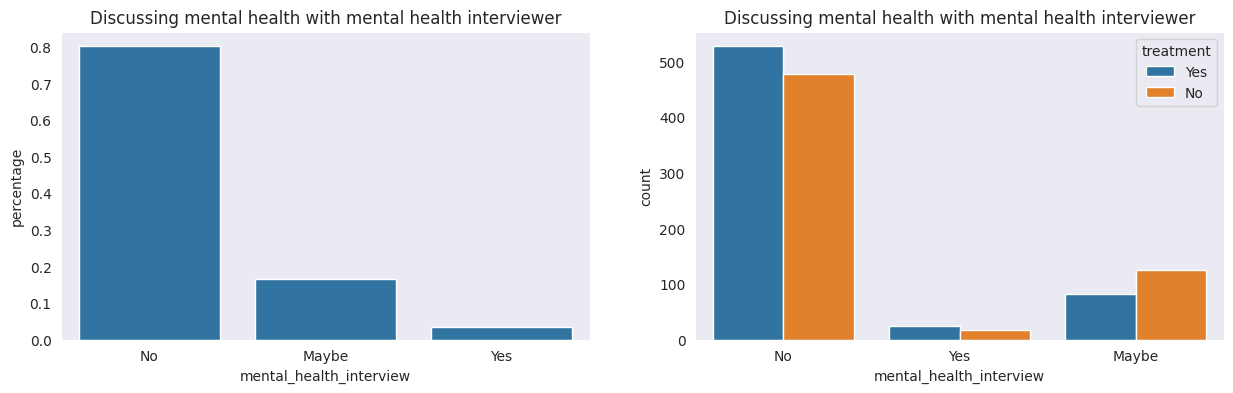

In [35]:

title1 = 'Discussing mental health with mental health interviewer'
pl_fig(mh_dataset['mental_health_interview'],title1, title1)

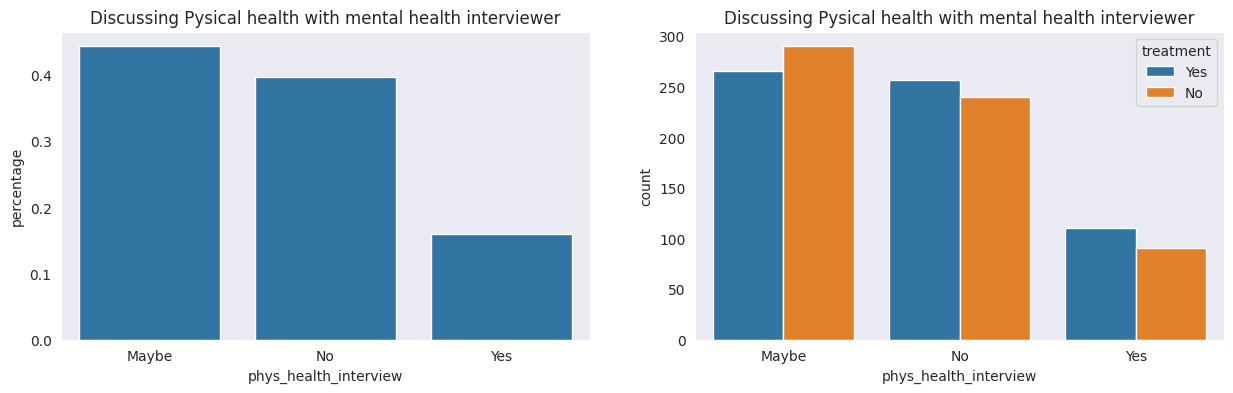

In [36]:
title1 = 'Discussing Pysical health with mental health interviewer'
pl_fig(mh_dataset['phys_health_interview'],title1, title1)

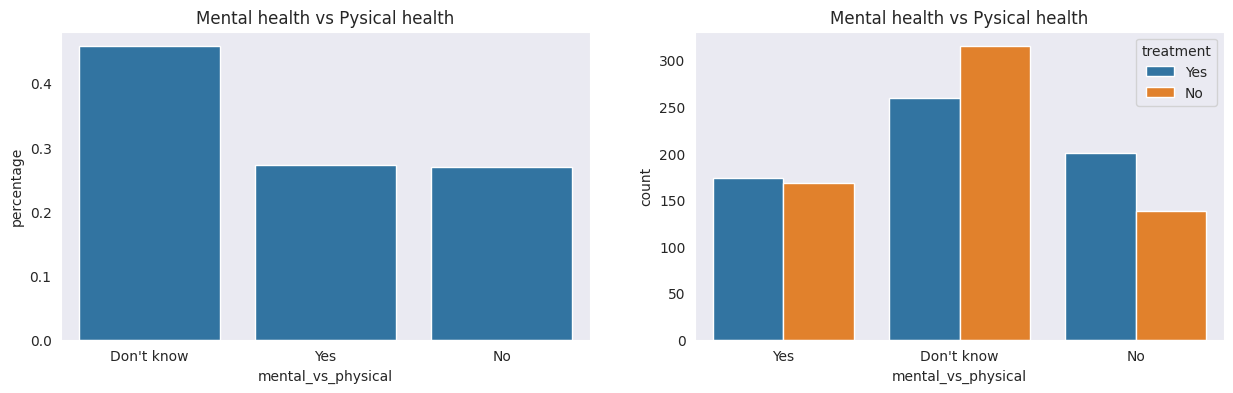

In [37]:
title1 = "Mental health vs Pysical health"
pl_fig(mh_dataset['mental_vs_physical'],title1, title1)

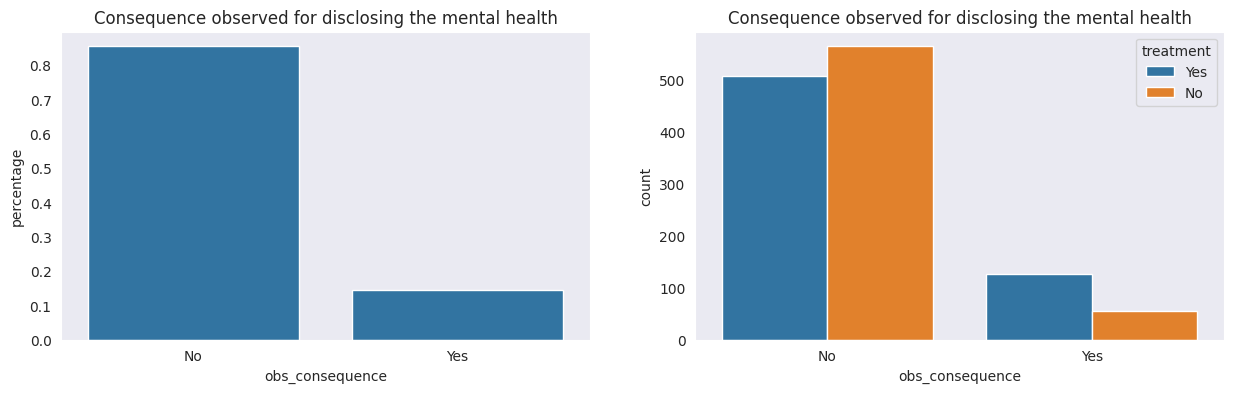

In [38]:
title1 = 'Consequence observed for disclosing the mental health'
pl_fig(mh_dataset['obs_consequence'],title1, title1)

In [39]:
mh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   self_employed              1254 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             1254 non-null   object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave        

In [40]:
mh_dataset.isnull().sum()

,0
Age,0
Gender,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0
tech_company,0
benefits,0


In [41]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col:
    print('{} :{} ' . format(col.upper(),mh_dataset[col].unique()))

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72] 
GENDER :['Female' 'Male' 'Other'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't Know"] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Yes' 'Maybe'] 
PHYS_HEALTH_INTE

In [42]:

from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(mh_dataset[col])
    mh_dataset[col] = label_encoder.transform(mh_dataset[col])

In [43]:
mh_dataset['treatment'].value_counts()

,count
treatment,
1,633
0,621


***HEAT MAP ***


*    We are creating a correlation matrix of the dataset, applying a mask to display only the lower triangle of the matrix, and then visualizing it as a heatmap with annotations using Seaborn, while customizing the color palette, aspect ratio, and other visual properties.



<Axes: >

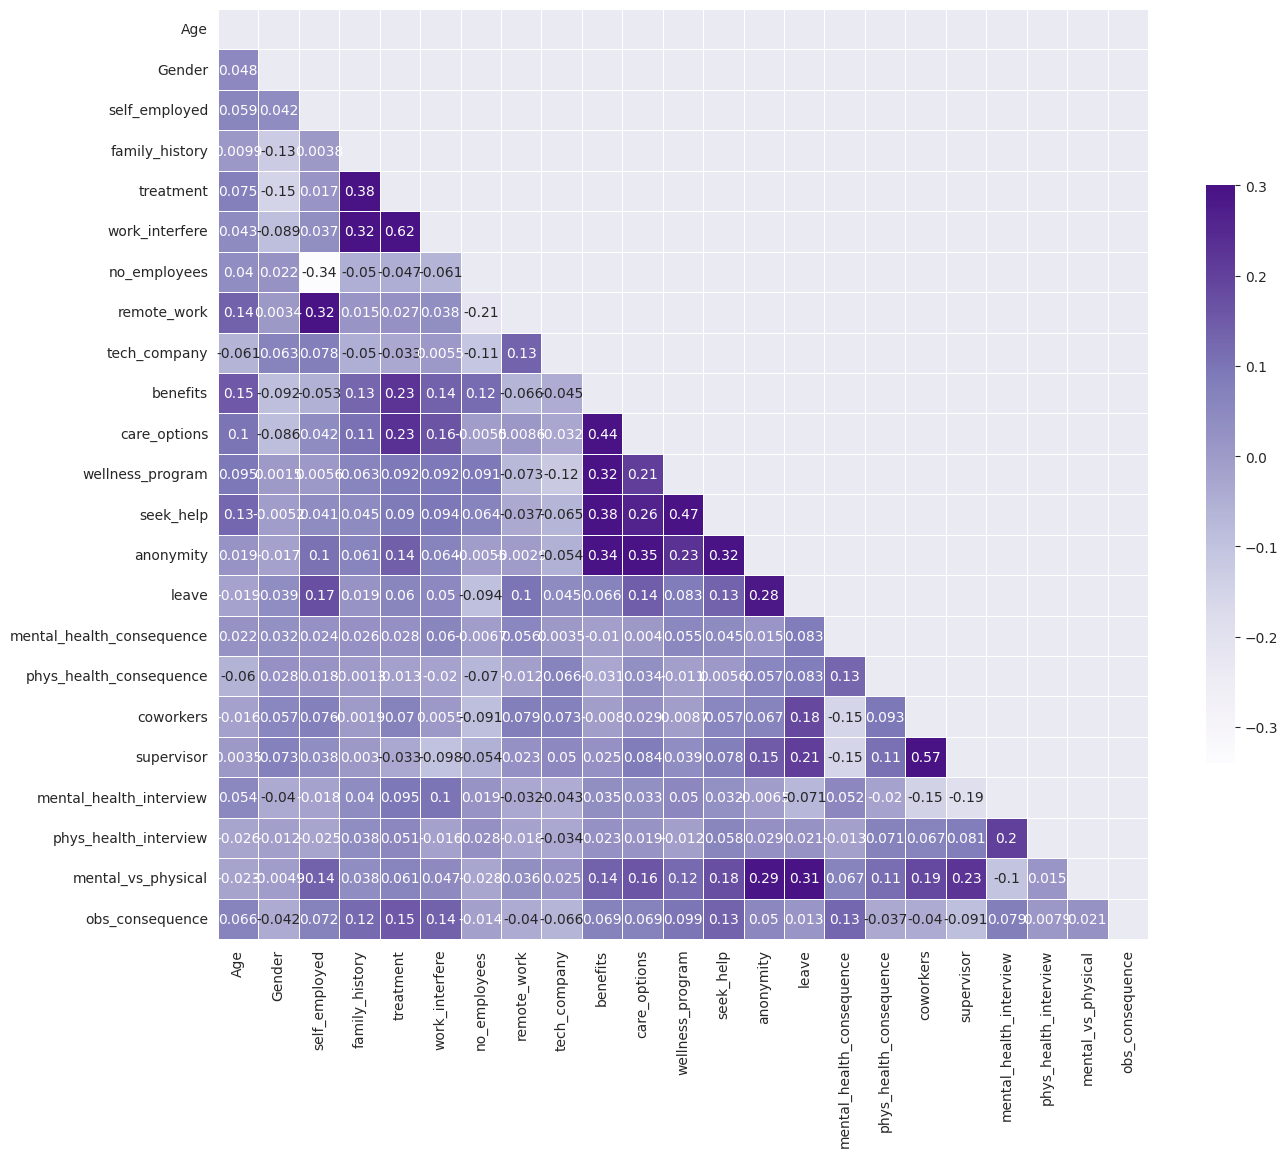

In [44]:
corr = mh_dataset.corr()

mask = np.zeros_like(corr, dtype=bool)  # Using Python's built-in bool
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

***EVALUATING MODEL***


*   In order to maintain the class distribution of the target variable (y)
throughout both sets, we are first dividing the dataset into features (X) and target (y). Next, we are using train_test_split to separate the data into training and testing sets, with 30% heading to the test set.
*   We are creating a dictionary model in which the names of various classification algorithms (such KNeighborsClassifier and LogisticRegression) serve as the keys, and the values are the matching model instances with specific parameters. This makes it simple to retrieve each model by name.
*   Multiple classification models from the models dictionary are being trained and evaluated. The accuracy of each model on the test set (X_test and y_test) is then calculated, and the accuracy results are appended to the predicted list while the model names and corresponding accuracy scores are printed.


In [45]:
import xgboost as xgb
from sklearn.metrics import RocCurveDisplay  # For plotting ROC curves
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier


In [46]:
from sklearn.model_selection import train_test_split
X = mh_dataset.drop('treatment', axis = 1)
y = mh_dataset['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, m

In [50]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8037135278514589
KNeighborsClassifier 0.6631299734748011
DecisionTreeClassifier 0.7214854111405835
RandomForestClassifier 0.7771883289124668
GradientBoostingClassifier 0.8116710875331565
AdaBoostClassifier 0.8010610079575596
XGBClassifier 0.7931034482758621


Text(0.5, 1.0, 'Plotting the Model Accuracies')

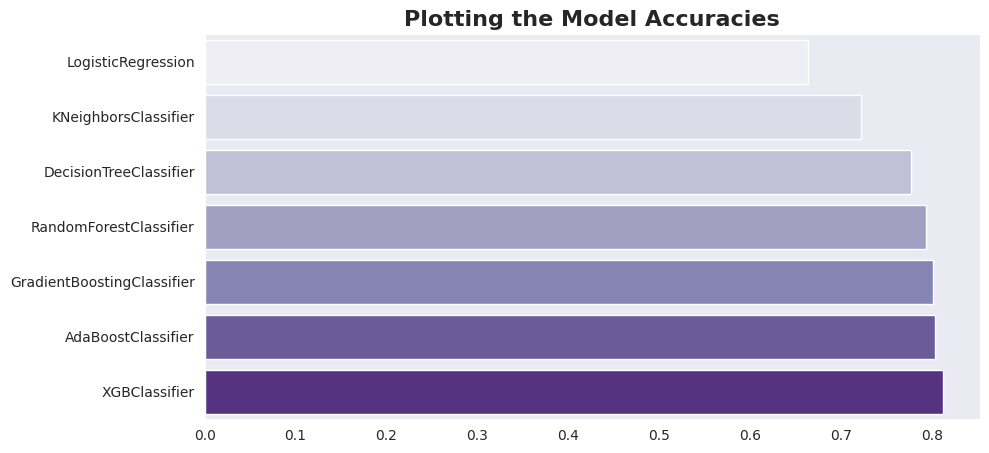

In [51]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = predicted, y = key, palette='Purples', order=predicted.sort())
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

***FUNCTION TO OUTPUT THE EDA ***

First 5 rows of the dataset:
   Age  Gender  self_employed  family_history  treatment  work_interfere  \
0   37       0              0               0          1               2   
1   44       1              0               0          0               3   
2   32       1              0               0          0               3   
3   31       1              0               1          1               2   
4   31       1              0               0          0               1   

   no_employees  remote_work  tech_company  benefits  ...  anonymity  leave  \
0             4            0             1         2  ...          2      2   
1             5            0             0         0  ...          0      0   
2             4            0             1         1  ...          0      1   
3             2            0             1         1  ...          1      1   
4             1            1             1         2  ...          0      0   

   mental_health_consequence  phys_heal

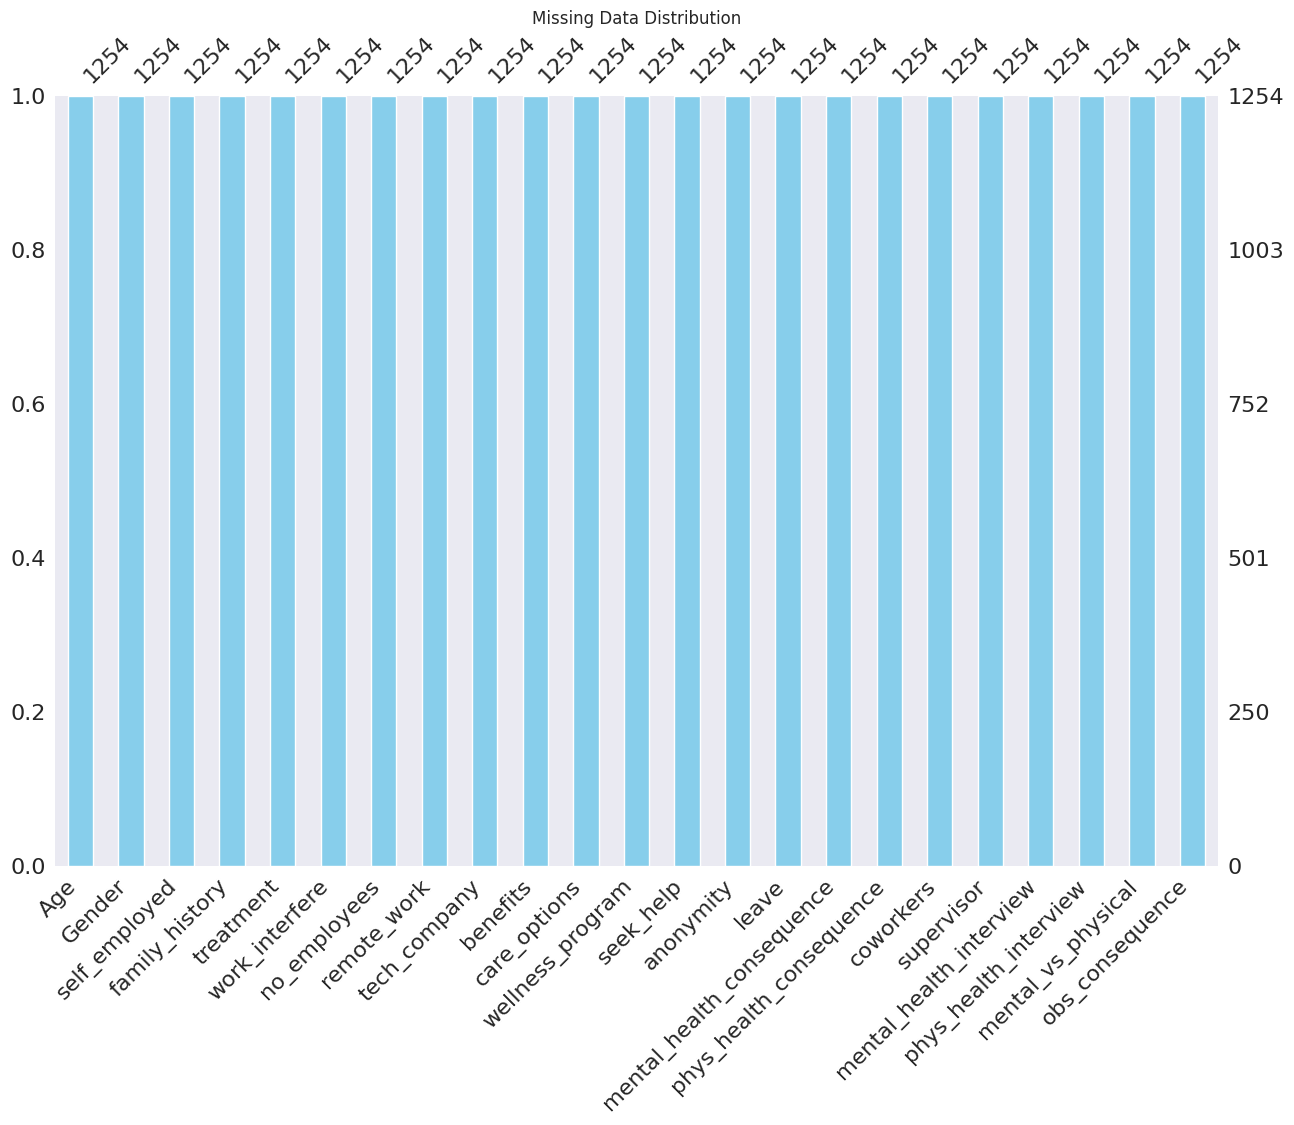


Descriptive statistics for numeric columns:
               Age       Gender  self_employed  family_history    treatment  \
count  1254.000000  1254.000000    1254.000000     1254.000000  1254.000000   
mean     32.019139     0.818182       0.114833        0.390750     0.504785   
std       7.375005     0.423328       0.318947        0.488113     0.500177   
min       5.000000     0.000000       0.000000        0.000000     0.000000   
25%      27.000000     1.000000       0.000000        0.000000     0.000000   
50%      31.000000     1.000000       0.000000        0.000000     1.000000   
75%      36.000000     1.000000       0.000000        1.000000     1.000000   
max      72.000000     2.000000       1.000000        1.000000     1.000000   

       work_interfere  no_employees  remote_work  tech_company     benefits  \
count     1254.000000   1254.000000  1254.000000   1254.000000  1254.000000   
mean         2.288676      2.785486     0.297448      0.819777     1.052632   
std   

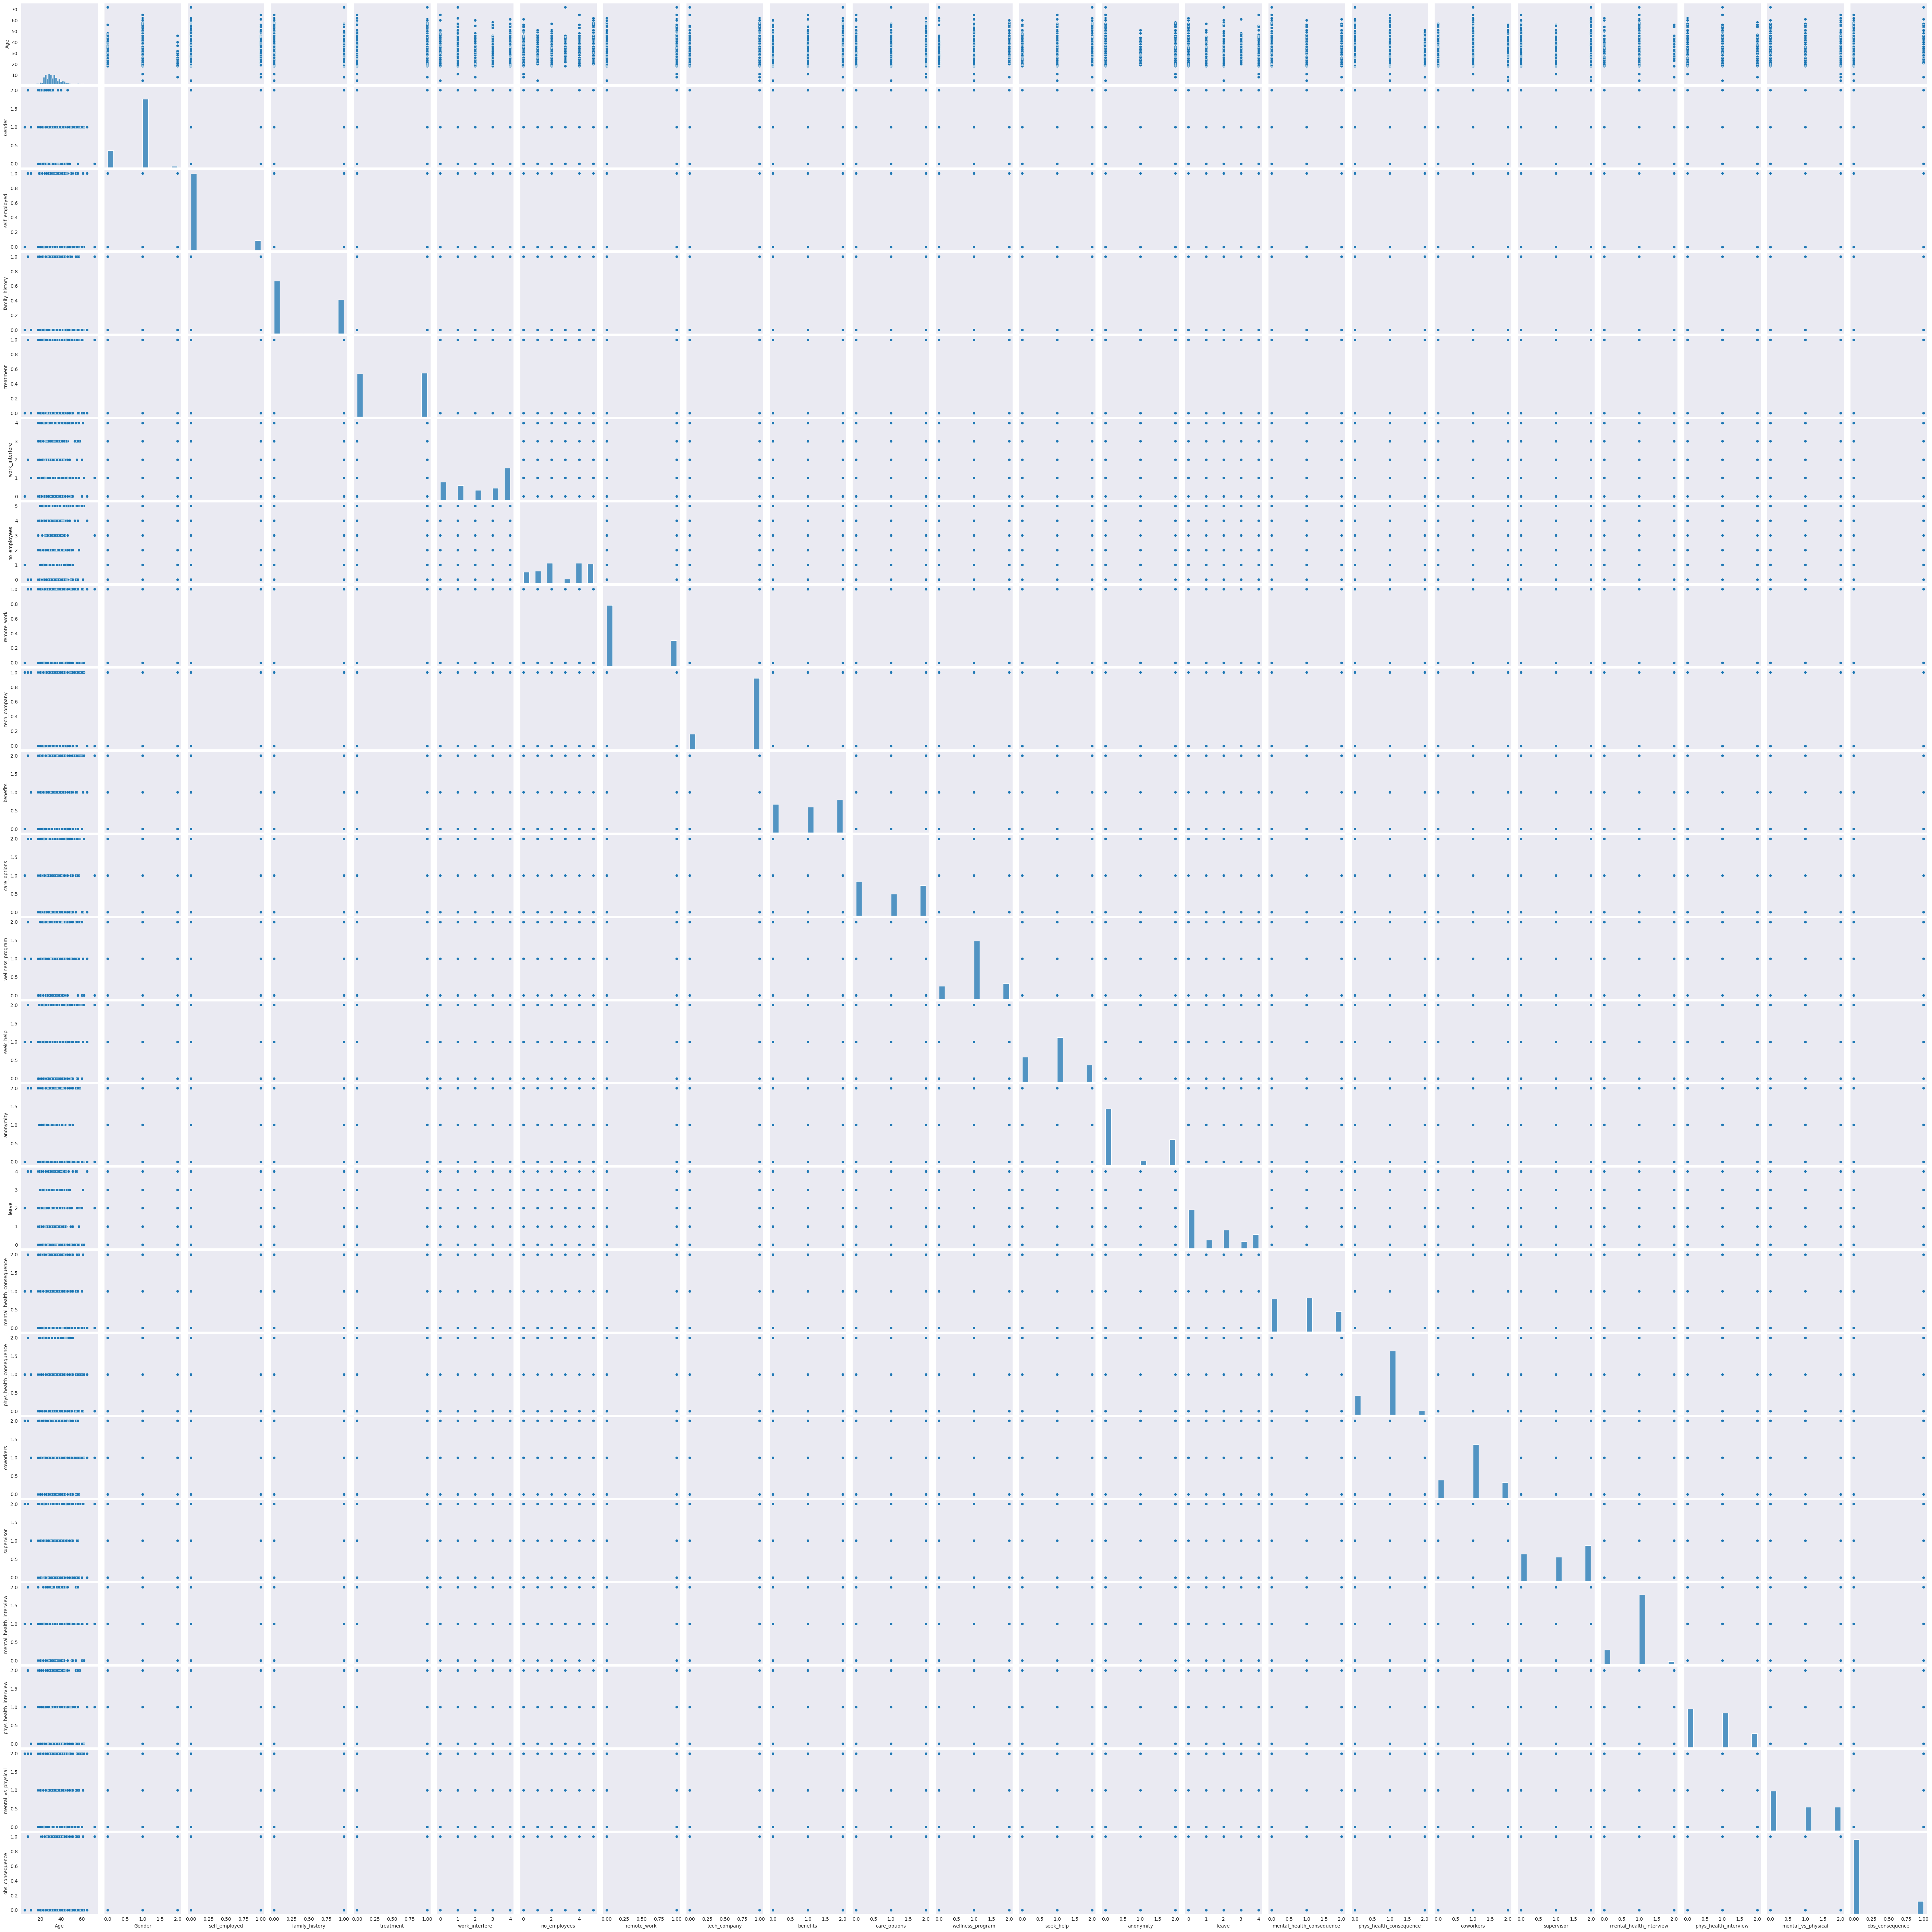

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

def perform_eda(df):
    """
    Function to perform exploratory data analysis (EDA) on a given DataFrame.
    """

    # Basic Summary of the Data
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nData Types and Missing Values:")
    print(df.info())
    print("\nUnique values in each column:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

    print("\nMissing values in each column:")
    print(df.isnull().sum())

    # Missing Data Visualization
    plt.figure(figsize=(10, 7))
    msno.bar(df, color='skyblue', figsize=(15,10))
    plt.title('Missing Data Distribution')
    plt.show()

    # Descriptive statistics for numeric columns
    print("\nDescriptive statistics for numeric columns:")
    print(df.describe())

    # Categorical Variable Analysis
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())

        # Plotting the distribution of categorical variables
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df, palette='pastel')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()

    # Pairplot for relevant numeric features (if needed)
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_columns) > 1:
        sns.pairplot(df[numeric_columns])
        plt.show()

# Call the EDA function on the dataset
perform_eda(mh_dataset)
